### visualize the lake height obtained by altimetry product.

In [ ]:
from glob import glob
import re
import netCDF4 as nc  
import geopandas as gpd
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from shapely import wkt


In [4]:
path_hma_gtng = 'data/hma-extent/HMA/hma_gtng_202307_subregions.gpkg'
path_dahiti_station = 'data/water-height/dahiti/dahiti_station_hma.gpkg'
path_hydroweb_station = 'data/water-height/hydroweb/hydroweb_stations_hma.gpkg'


In [5]:
dahiti_station = gpd.read_file(path_dahiti_station)
hydroweb_station = gpd.read_file(path_hydroweb_station)
hma_gtng = gpd.read_file(path_hma_gtng)
## remove the stations that are not in HMA lakes
dahiti_station = dahiti_station.dropna()
hydroweb_station = hydroweb_station.dropna()


In [ ]:
# Find common Hylak_id values between dahiti_station and hydroweb_station
common_hylak_ids = set(dahiti_station['Hylak_id']).intersection(set(hydroweb_station['Hylak_id']))
print(f"Number of common Hylak_id: {len(common_hylak_ids)}")
station_hydroweb_dahiti_both = hydroweb_station[hydroweb_station['Hylak_id'].isin(common_hylak_ids)]
hydroweb_station_only = hydroweb_station[~hydroweb_station['Hylak_id'].isin(common_hylak_ids)]
dahiti_station_only = dahiti_station[~dahiti_station['Hylak_id'].isin(common_hylak_ids)]


Number of common Hylak_id: 47


#### obtain a geodataframe by setting the Hylak_geom as geometry.

In [31]:
hydroweb_lake_geom = hydroweb_station[['name', 'Hylak_geom']].copy()
# Convert WKT strings to shapely geometries, handle None gracefully
hydroweb_lake_geom['Hylak_geom'] = hydroweb_lake_geom['Hylak_geom'].apply(lambda x: wkt.loads(x) if isinstance(x, str) else None)
hydroweb_lake_geom = gpd.GeoDataFrame(hydroweb_lake_geom, geometry='Hylak_geom', crs='EPSG:4326') 


In [ ]:
dahiti_lake_geom = dahiti_station[['name', 'Hylak_geom']].copy()
# Convert WKT strings to shapely geometries, handle None gracefully
dahiti_lake_geom['Hylak_geom'] = dahiti_lake_geom['Hylak_geom'].apply(lambda x: wkt.loads(x) if isinstance(x, str) else None)
dahiti_lake_geom = gpd.GeoDataFrame(dahiti_lake_geom, geometry='Hylak_geom', crs='EPSG:4326') 


Text(0.5, 1.0, 'Distribution of altimetry-based water level station')

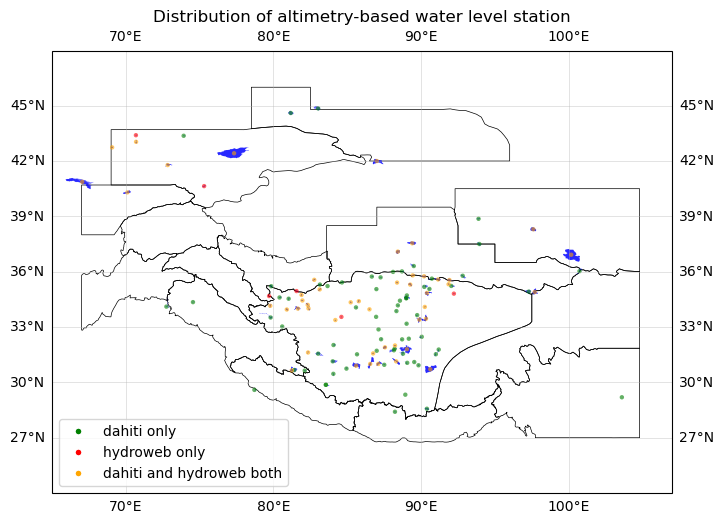

In [41]:
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw={'projection': ccrs.PlateCarree()})
ax.set_extent([65.0, 107.0, 24.0, 46.0])
ax.gridlines(draw_labels=True, linewidth=0.5, alpha=0.5, zorder=1)
hma_gtng.plot(ax=ax, edgecolor='black', facecolor='none', linewidth=0.5)
dahiti_lake_geom.plot(ax=ax, edgecolor='none', facecolor='blue',  alpha=0.6)
hydroweb_lake_geom.plot(ax=ax, edgecolor='none', facecolor='blue',  alpha=0.6)
dahiti_station_only.plot(ax=ax, edgecolor='none', facecolor='green', markersize=10, alpha=0.6, marker='o')
hydroweb_station_only.plot(ax=ax, edgecolor='none', facecolor='red', markersize=10, alpha=0.6, marker='o')
station_hydroweb_dahiti_both.plot(ax=ax, edgecolor='none', facecolor='orange', markersize=10, alpha=0.6, marker='o')
legend_patches = [
    Line2D([0], [0], marker='o', color='w', markerfacecolor='green', markersize=5, label='dahiti only'),
    Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=5, label='hydroweb only'),
    Line2D([0], [0], marker='o', color='w', markerfacecolor='orange', markersize=5, label='dahiti and hydroweb both'),
    ]
ax.legend(handles=legend_patches, loc='lower left')
ax.set_title('Distribution of altimetry-based water level station', fontsize=12)
# plt.savefig('figures/hma_altimetry_stations.png', bbox_inches='tight', dpi=100)



#### show the time-series water level
dahiti:

In [9]:
# dir_dahiti = 'data/altimetry-water-level/dahiti'
# paths_dahiti = glob(dir_dahiti + '/*.nc')
# print(len(paths_dahiti))
# paths_dahiti[0]


In [10]:
# id = 230
# dset = nc.Dataset(paths_dahiti[id], mode='r')
# date = dset['datetime'][:]
# wat_level = dset['water_level'][:]
# date_decimal = [date2decimal(dt) for dt in date]
# plt.rcParams.update({'font.size':8})
# fig = plt.figure(figsize=(12,3))
# ### location of the station
# ax1 = fig.add_subplot(1,2,1,projection=ccrs.PlateCarree())
# ax1.set_extent([65.0, 107.0, 24.0, 46.0])
# ax1.gridlines(draw_labels=True, linewidth=0.5, alpha=0.5, zorder=1)
# hma_gtng.plot(ax=ax1, edgecolor='black', facecolor='none', linewidth=0.5)
# ax1.scatter(dset.longitude, dset.latitude, color='red', s=20, alpha=1, zorder=2)
# ax1.stock_img()
# ### time-series water level
# ax2 = fig.add_subplot(1,2,2)
# ax2.plot(date_decimal, wat_level, marker='o', linestyle='--', color='blue', linewidth=1, markersize=3)
# fig.suptitle(f'dahiti station: {dset.target_name}', fontsize=12, y=1.01)


hydroweb:

In [11]:
# dir_hydroweb = 'data/altimetry-water-level/hydroweb/hydroweb_lakes'
# paths_hydroweb = glob(dir_hydroweb + '/*.txt')
# print(len(paths_hydroweb))
# paths_hydroweb[0]


In [12]:
# id = 32
# lake_name = paths_hydroweb[id].split('/')[-1].split('.')[0].split('_')[-1]
# with open(paths_hydroweb[id], 'r') as f:
#     content = f.read()
#     # Extract decimal year and height using regular expressions
#     pattern = re.compile(r'(\d+\.\d+)\s*;\s*\d{4}/\d{2}/\d{2}\s*;\s*\d{2}:\d{2}\s*;\s*([\d\.]+)')
#     matches = pattern.findall(content)
#     # Convert matches to lists of floats
#     decimal_years = [float(match[0]) for match in matches]
#     heights = [float(match[1]) for match in matches]
#     # Extract longitude and latitude from the content
#     lon_match = re.search(r'lon=([\d\.]+)', content)
#     lat_match = re.search(r'lat=([\d\.]+)', content)
#     loc = (float(lon_match.group(1)), float(lat_match.group(1)))


In [13]:
# plt.rcParams.update({'font.size':8})
# fig = plt.figure(figsize=(12,3))
# ### location of the station
# ax1 = fig.add_subplot(1,2,1,projection=ccrs.PlateCarree())
# ax1.set_extent([65.0, 107.0, 24.0, 46.0])
# ax1.gridlines(draw_labels=True, linewidth=0.5, alpha=0.5, zorder=1)
# hma_gtng.plot(ax=ax1, edgecolor='black', facecolor='none', linewidth=0.5)
# ax1.scatter(loc[0], loc[1], color='red', s=20, alpha=1, zorder=2)
# ax1.stock_img()
# ### time-series water level
# ax2 = fig.add_subplot(1,2,2)
# ax2.plot(decimal_years, heights, marker='o', linestyle='--', color='blue', linewidth=1, markersize=3)
# fig.suptitle(f'hydroweb station: {lake_name}', fontsize=12, y=1.01)
